In [1]:
import pandas as pd # 모듈 불러오기

In [2]:
df = pd.read_csv("test1_modify.csv") # 데이터셋 불러오기
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,sec,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


In [3]:
df.columns # 변수 확인

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour', 'minute', 'sec', 'dayofweek'],
      dtype='object')

# Data Preparation
- train / test split      -> row 를 분리
- features (문제) / label (풀고 싶은 것) split  -> column 분리

In [4]:
# feature / label split

X = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour', 'minute','dayofweek']] # 독립 변수들 선정
y = df['count'] # 종속 변수 설정

In [5]:
# train / test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_test

(8708, 14)
(2178, 14)
(8708,)
(2178,)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,dayofweek
2698,3,0,1,1,28.70,31.820,42,11.0014,2011,7,1,8,0,4
5197,4,0,0,1,13.94,15.150,34,23.9994,2011,12,10,15,0,5
5135,4,0,1,1,10.66,11.365,81,23.9994,2011,12,8,1,0,3
2147,2,0,1,1,24.60,29.545,69,12.9980,2011,5,16,9,0,0
8286,3,0,1,1,37.72,40.910,29,12.9980,2012,7,6,15,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,3,0,1,1,29.52,34.850,79,0.0000,2011,7,8,1,0,4
5266,4,0,1,1,14.76,16.665,43,23.9994,2011,12,13,12,0,1
7731,2,0,0,1,25.42,31.060,43,23.9994,2012,6,2,12,0,5
3311,3,0,0,1,29.52,35.605,84,7.0015,2011,8,7,21,0,6


### Modeling
- 지도학습 사례 2가지 : 분류(classfication) - 객관식이다 경우의 수를 가져다가 분류하는 느낌, 회귀(regression) 나중을 예측하는 것이 주 목적 주관식 느낌, 특징(숫자 공부)
- Regressor로 끝나면 회귀 모델, Classifier로 끝나면 분류 모델
- Logisitic Regression 로지스틱 회귀분석 --> 분류이다.

- 현재 데이터셋의 종속변수는 수치형이기 때문에 회귀 모델을 사용해주어야한다.

In [7]:
# 선형 회귀 모델

from sklearn.linear_model import LinearRegression

LR = LinearRegression()
model = LR.fit(X_train, y_train)

model.score(X_test, y_test)

0.37979113059892

In [8]:
y_pred = model.predict(X_test)
y_pred

array([217.95341295, 230.76350108,   5.87469667, ..., 321.94976438,
       261.78894305, 105.22957058])

In [9]:
from sklearn.ensemble import RandomForestRegressor as rf   # 랜덤포레스트 

In [10]:
model1 = rf()
model1.fit(X_train, y_train) # 학습을 하는 단계, 공부

RandomForestRegressor()

In [11]:
# model.score(X_train, y_train) 트레인으로 학습을 하고 결과확인을 트레인으로 할 때 결과값이 100퍼센트로 나오지않는 이유 : 
#                               overfitting 과적합 때문이다. 트레인 데이터를 너무 학습을 잘하면 막상 test 일 때 결과를 
#                               계산하지 못할수 있기 때문이다.
 

In [12]:
model1.score(X_test, y_test) # 결과를 확인하는 단계


# 결과값의 의미 : 미래의 데이터도 이정도 수준으로 맞출 것이다.

0.9525679318279973

### 결정 계수 ( R-squared, R제곱)
- 회귀 분석이 얼마나 잘 되었는지 평가하는 지표
- 0 ~ 1 사이의 값을 갖고, 1에 가까울수록 예측력이 좋다고 판단한다. 완벽히 1일수는 없다. 1이면 노벨상

- R^2 = 1 - SSE((실제값 - 예측값)^2의 합) / SST ((실제값 - 평균값)^2의 합)
- R^2 = 1 - SSE / SST
- target에 평균 정도를 예측하는 수준이라면 R^2는 0에 가까워지고,
- 예측이 target에 가까워지면 1에 가까운 값이 된다. 

In [13]:
y_pred = model1.predict(X_train) # 모델이 예측한 값
y_pred

array([398.6 , 187.7 , 727.92, ...,   4.94, 132.57, 151.05])

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred1 = model1.predict(X_test)
y_pred1

array([457.11, 277.56,  13.62, ..., 638.58, 151.59,   5.28])

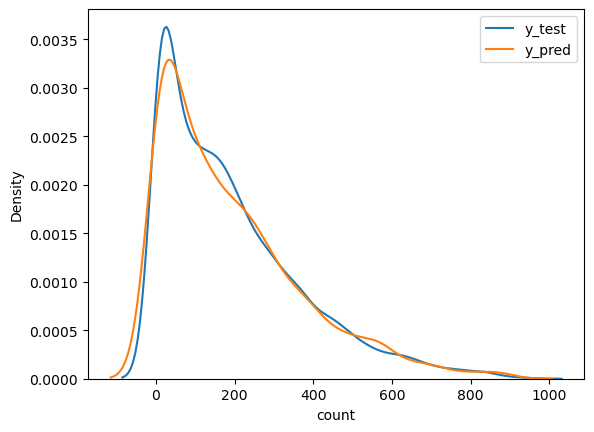

In [15]:
sns.kdeplot(y_pred) # 예측
sns.kdeplot(y_test) # 실제값
plt.legend(labels=['y_test', 'y_pred'])

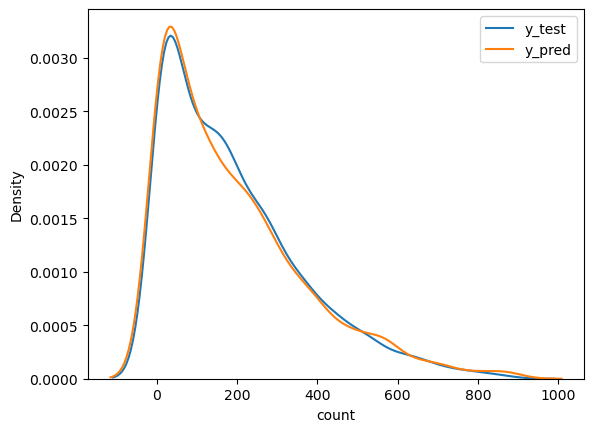

In [16]:
sns.kdeplot(y_pred1) # 예측
sns.kdeplot(y_test) # 실제값
plt.legend(labels=['y_test', 'y_pred'])